In [1]:
from itertools import islice, cycle
from tau_profile_parser import TauProfileParser
import pandas as pd
import plotly.graph_objs as go

Plotly Bar Plot Examples
========================

This notebook demonstrates using the TauProfileParser to parse TAU profile.x.y.z files and using Plotly to generate ParaProf-style bar plots from them.

The TAU Profile Parser
----------------------

First, we call `TauProfileParser.parse` on the path to a directory containing TAU profile files. 

Note that the parser does not currently have any native support for MULTI_ directories, so if you have those
you'll have to call parse multiple times and then, if you wish, merge the resulting dataframes. This functionality should be added to the parser.

In [2]:
lulesh_data_time = TauProfileParser.parse('/storage/users/MTrappett/multi_july_30/MULTI__TIME')
lulesh_data_dp = TauProfileParser.parse('/storage/users/MTrappett/multi_july_30/MULTI__PAPI_TOT_INS')

This returns an object that provides access to the metric name, metadata, and the interval and atomic/userevent data.

The `metric` attribute contains the metric that values in this profile represent. (This representation will need to change when multi-metric data can be read in directly)


In [3]:
lulesh_data_time.metric

b'TIME'

In [4]:
lulesh_data_dp.metric

b'PAPI_TOT_INS'

The `metadata` attribute contains a Python dictionary of the metadata recorded in the profile.0.0.0 file

In [5]:
lulesh_data_time.metadata

{'Metric Name': 'TIME',
 'CPU MHz': '3783.000000MHz',
 'CPU Type': 'POWER9, altivec supported',
 'CWD': '/storage/users/MTrappett/tau2',
 'Command Line': '../LULESH/lulesh2.0 -p -i 100',
 'Ending Timestamp': '1596130197918456',
 'Executable': '/storage/users/MTrappett/LULESH/lulesh2.0',
 'Hostname': 'gorgon',
 'Local Time': '2020-07-30T10:29:55-07:00',
 'Memory Size': '395901568 kB',
 'Node Name': 'gorgon',
 'OMP_CHUNK_SIZE': '0',
 'OMP_DEFAULT_DEVICE': '0',
 'OMP_DYNAMIC': 'FALSE',
 'OMP_MAX_ACTIVE_LEVELS': '2147483647',
 'OMP_MAX_TASK_PRIORITY': '0',
 'OMP_MAX_THREADS': '12',
 'OMP_NUM_PLACES': '1',
 'OMP_NUM_PROCS': '160',
 'OMP_PLACE_NUM_PROCS': '{0:160}',
 'OMP_PLACE_PROC_IDS': '{0:[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,1

In [6]:
lulesh_data_dp.metadata

{'Metric Name': 'PAPI_TOT_INS',
 'CPU MHz': '3783.000000MHz',
 'CPU Type': 'POWER9, altivec supported',
 'CWD': '/storage/users/MTrappett/tau2',
 'Command Line': '../LULESH/lulesh2.0 -p -i 100',
 'Ending Timestamp': '1596130197918456',
 'Executable': '/storage/users/MTrappett/LULESH/lulesh2.0',
 'Hostname': 'gorgon',
 'Local Time': '2020-07-30T10:29:55-07:00',
 'Memory Size': '395901568 kB',
 'Node Name': 'gorgon',
 'OMP_CHUNK_SIZE': '0',
 'OMP_DEFAULT_DEVICE': '0',
 'OMP_DYNAMIC': 'FALSE',
 'OMP_MAX_ACTIVE_LEVELS': '2147483647',
 'OMP_MAX_TASK_PRIORITY': '0',
 'OMP_MAX_THREADS': '12',
 'OMP_NUM_PLACES': '1',
 'OMP_NUM_PROCS': '160',
 'OMP_PLACE_NUM_PROCS': '{0:160}',
 'OMP_PLACE_PROC_IDS': '{0:[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,1

The `indices` attribute contains the (node, context, thread) tuples that are present in this profile.

In [7]:
lulesh_data = lulesh_data_time
lulesh_data.indices

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 0, 10),
 (0, 0, 11)]

The `atomic_data()` function returns a Pandas dataframe containing the atomic events (user and context events). This is a multi-index dataframe with Node, Context, Thread, and Timer as the indices.

(This profile was collected with an instrumented version of Open MPI which collects memory allocations for different object sizes.)

In [8]:
lulesh_data.atomic_data()

Empty DataFrame
Columns: [Count, Maximum, Minimum, Mean, SumSq]
Index: []

The `interval_data()` function returns the timer data. As with atomic_data(), it is returned as a multi-index Pandas dataframe with Node, Context, Thread, and Timer as the indices.

In [9]:
lulesh_data.interval_data()

Calls  \
Node Context Thread Timer                                                       
0    0       0      .TAU application                                        1   
                    OpenMP_Parallel_Region TimeIncrement [{/home/us...    100   
                    OpenMP_Implicit_Task                                49200   
                    OpenMP_Sync_Region_Barrier TimeIncrement [{/hom...    100   
                    OpenMP_Parallel_Region InitStressTermsForElems ...    100   
...                                                                       ...   
             11     OpenMP_Implicit_Task                                49200   
                    OpenMP_Sync_Region_Barrier ApplyMaterialPropert...    100   
                    OpenMP_Sync_Region_Barrier EvalEOSForElems(Doma...   3500   
                    OpenMP_Sync_Region_Barrier CalcCourantConstrain...   1100   
                    OpenMP_Sync_Region_Barrier CalcHydroConstraintF...   1100   

                                                                        Subcalls  \
Node Context Thread Timer                                                          
0    0       0      .TAU application                                       49200   
                    OpenMP_Parallel_Region TimeIncrement [{/home/us...       100   
                    OpenMP_Implicit_Task                                   55000   
                    OpenMP_Sync_Region_Barrier TimeIncrement [{/hom...         0   
                    OpenMP_Parallel_Region InitStressTermsForElems ...       100   
...                                                                          ...   
             11     OpenMP_Implicit_Task                                    5800   
                    OpenMP_Sync_Region_Barrier ApplyMaterialPropert...         0   
                    OpenMP_Sync_Region_Barrier EvalEOSForElems(Doma...         0   
                    OpenMP_Sync_Region_Barrier CalcCourantConstrain...         0   
                    OpenMP_Sync_Region_Barrier CalcHydroConstraintF...         0   

                                                                        Exclusive  \
Node Context Thread Timer                                                           
0    0       0      .TAU application                                       511348   
                    OpenMP_Parallel_Region TimeIncrement [{/home/us...       1731   
                    OpenMP_Implicit_Task                                   891227   
                    OpenMP_Sync_Region_Barrier TimeIncrement [{/hom...       2751   
                    OpenMP_Parallel_Region InitStressTermsForElems ...       1055   
...                                                                           ...   
             11     OpenMP_Implicit_Task                                  1807735   
                    OpenMP_Sync_Region_Barrier ApplyMaterialPropert...        946   
                    OpenMP_Sync_Region_Barrier EvalEOSForElems(Doma...      31866   
                    OpenMP_Sync_Region_Barrier CalcCourantConstrain...       9663   
                    OpenMP_Sync_Region_Barrier CalcHydroConstraintF...       9666   

                                                                        Inclusive  \
Node Context Thread Timer                                                           
0    0       0      .TAU application                                      2362876   
                    OpenMP_Parallel_Region TimeIncrement [{/home/us...       6168   
                    OpenMP_Implicit_Task                                  1345457   
                    OpenMP_Sync_Region_Barrier TimeIncrement [{/hom...       2751   
                    OpenMP_Parallel_Region InitStressTermsForElems ...       3635   
...                                                                           ...   
             11     OpenMP_Implicit_Task                                  1859876   
                    OpenMP_Sync_Region_Barrier ApplyMa

We can manipulate this using normal Pandas functions. For example, here are the timers on (0,0,0) sorted by number of calls descending.

In [10]:
lulesh_data.interval_data().loc[0,0,0].sort_values('Calls', ascending=False)

Calls  Subcalls  \
Timer                                                                 
OpenMP_Implicit_Task                                49200     55000   
OpenMP_Parallel_Region CalcPressureForElems [{/...  10500     10500   
OpenMP_Sync_Region_Barrier CalcPressureForElems...  10500         0   
OpenMP_Sync_Region_Barrier CalcPressureForElems...   7000         0   
OpenMP_Parallel_Region CalcPressureForElems [{/...   7000      7000   
...                                                   ...       ...   
OpenMP_Parallel_Region CalcLagrangeElements [{/...    100       100   
OpenMP_Sync_Region_Barrier CalcLagrangeElements...    100         0   
OpenMP_Parallel_Region Domain::AllocateGradient...    100       100   
OpenMP_Sync_Region_Barrier Domain::AllocateGrad...    100         0   
.TAU application                                        1     49200   

                                                    Exclusive  Inclusive  \
Timer                                                                      
OpenMP_Implicit_Task                                   891227    1345457   
OpenMP_Parallel_Region CalcPressureForElems [{/...     107560     323362   
OpenMP_Sync_Region_Barrier CalcPressureForElems...      74104      74104   
OpenMP_Sync_Region_Barrier CalcPressureForElems...      45203      45203   
OpenMP_Parallel_Region CalcPressureForElems [{/...      71714     211083   
...                                                       ...        ...   
OpenMP_Parallel_Region CalcLagrangeElements [{/...       1057       3893   
OpenMP_Sync_Region_Barrier CalcLagrangeElements...        892        892   
OpenMP_Parallel_Region Domain::AllocateGradient...       1047      16828   
OpenMP_Sync_Region_Barrier Domain::AllocateGrad...       1515       1515   
.TAU application                                       511348    2362876   

                                                    ProfileCalls  \
Timer                                                              
OpenMP_Implicit_Task                                           0   
OpenMP_Parallel_Region CalcPressureForElems [{/...             0   
OpenMP_Sync_Region_Barrier CalcPressureForElems...             0   
OpenMP_Sync_Region_Barrier CalcPressureForElems...             0   
OpenMP_Parallel_Region CalcPressureForElems [{/...             0   
...                                                          ...   
OpenMP_Parallel_Region CalcLagrangeElements [{/...             0   
OpenMP_Sync_Region_Barrier CalcLagrangeElements...             0   
OpenMP_Parallel_Region Domain::AllocateGradient...             0   
OpenMP_Sync_Region_Barrier Domain::AllocateGrad...             0   
.TAU application                                               0   

                                                                  Group  \
Timer                                                                     
OpenMP_Implicit_Task                                 GROUP="TAU_OPENMP"   
OpenMP_Parallel_Region CalcPressureForElems [{/...   GROUP="TAU_OPENMP"   
OpenMP_Sync_Region_Barrier CalcPressureForElems...   GROUP="TAU_OPENMP"   
OpenMP_Sync_Region_Barrier CalcPressureForElems...   GROUP="TAU_OPENMP"   
OpenMP_Parallel_Region CalcPressureForElems [{/...   GROUP="TAU_OPENMP"   
...                                                                 ...   
OpenMP_Parallel_Region CalcLagrangeElements [{/...   GROUP="TAU_OPENMP"   
OpenMP_Sync_Region_Barrier CalcLagrangeElements...   GROUP="TAU_OPENMP"   
OpenMP_Parallel_Region Domain::AllocateGradient...   GROUP="TAU_OPENMP"   
OpenMP_Sync_Region_Barrier Domain::AllocateGrad...   GROUP="TAU_OPENMP"   
.TAU application                                    GROUP="TAU_DEFAULT"   

                                                                                           Timer Name  \
Timer                                                                                                   
OpenMP_Implicit_Task                                                

Find the mean exclusive time for each timer across all (node, context, thread) indices.

In [11]:
lulesh_data.interval_data().groupby('Timer').agg({'Exclusive': 'mean'}).sort_values('Exclusive', ascending=False)

Exclusive
Timer                                                           
OpenMP_Implicit_Task                                1.740387e+06
OpenMP_Thread_Type_ompt_thread_worker               4.867001e+05
OpenMP_Parallel_Region CalcPressureForElems [{/...  1.075600e+05
OpenMP_Sync_Region_Barrier CalcPressureForElems...  7.410400e+04
OpenMP_Parallel_Region CalcPressureForElems [{/...  7.171400e+04
...                                                          ...
OpenMP_Sync_Region_Barrier InitStressTermsForEl...  7.210000e+02
OpenMP_Sync_Region_Barrier CalcVelocityForNodes...  7.080000e+02
OpenMP_Sync_Region_Barrier UpdateVolumesForElem...  6.080000e+02
OpenMP_Sync_Region_Barrier ApplyAccelerationBou...  5.080000e+02
OpenMP_Sync_Region_Barrier ApplyMaterialPropert...  3.490000e+02

[69 rows x 1 columns]

Plotly Stacked Bar Chart: The ParaProf Overall Profile View
-----------------------------------------------------------

Plotly can be used to generate bar plots similar to those that ParaProf generates.

This section demonstrates producing a plot similar to ParaProf's overview, the mode that profiles are first opened in. We want to generate something like this, which what ParaProf generates for the profile that we've loaded as `lulesh_data`:

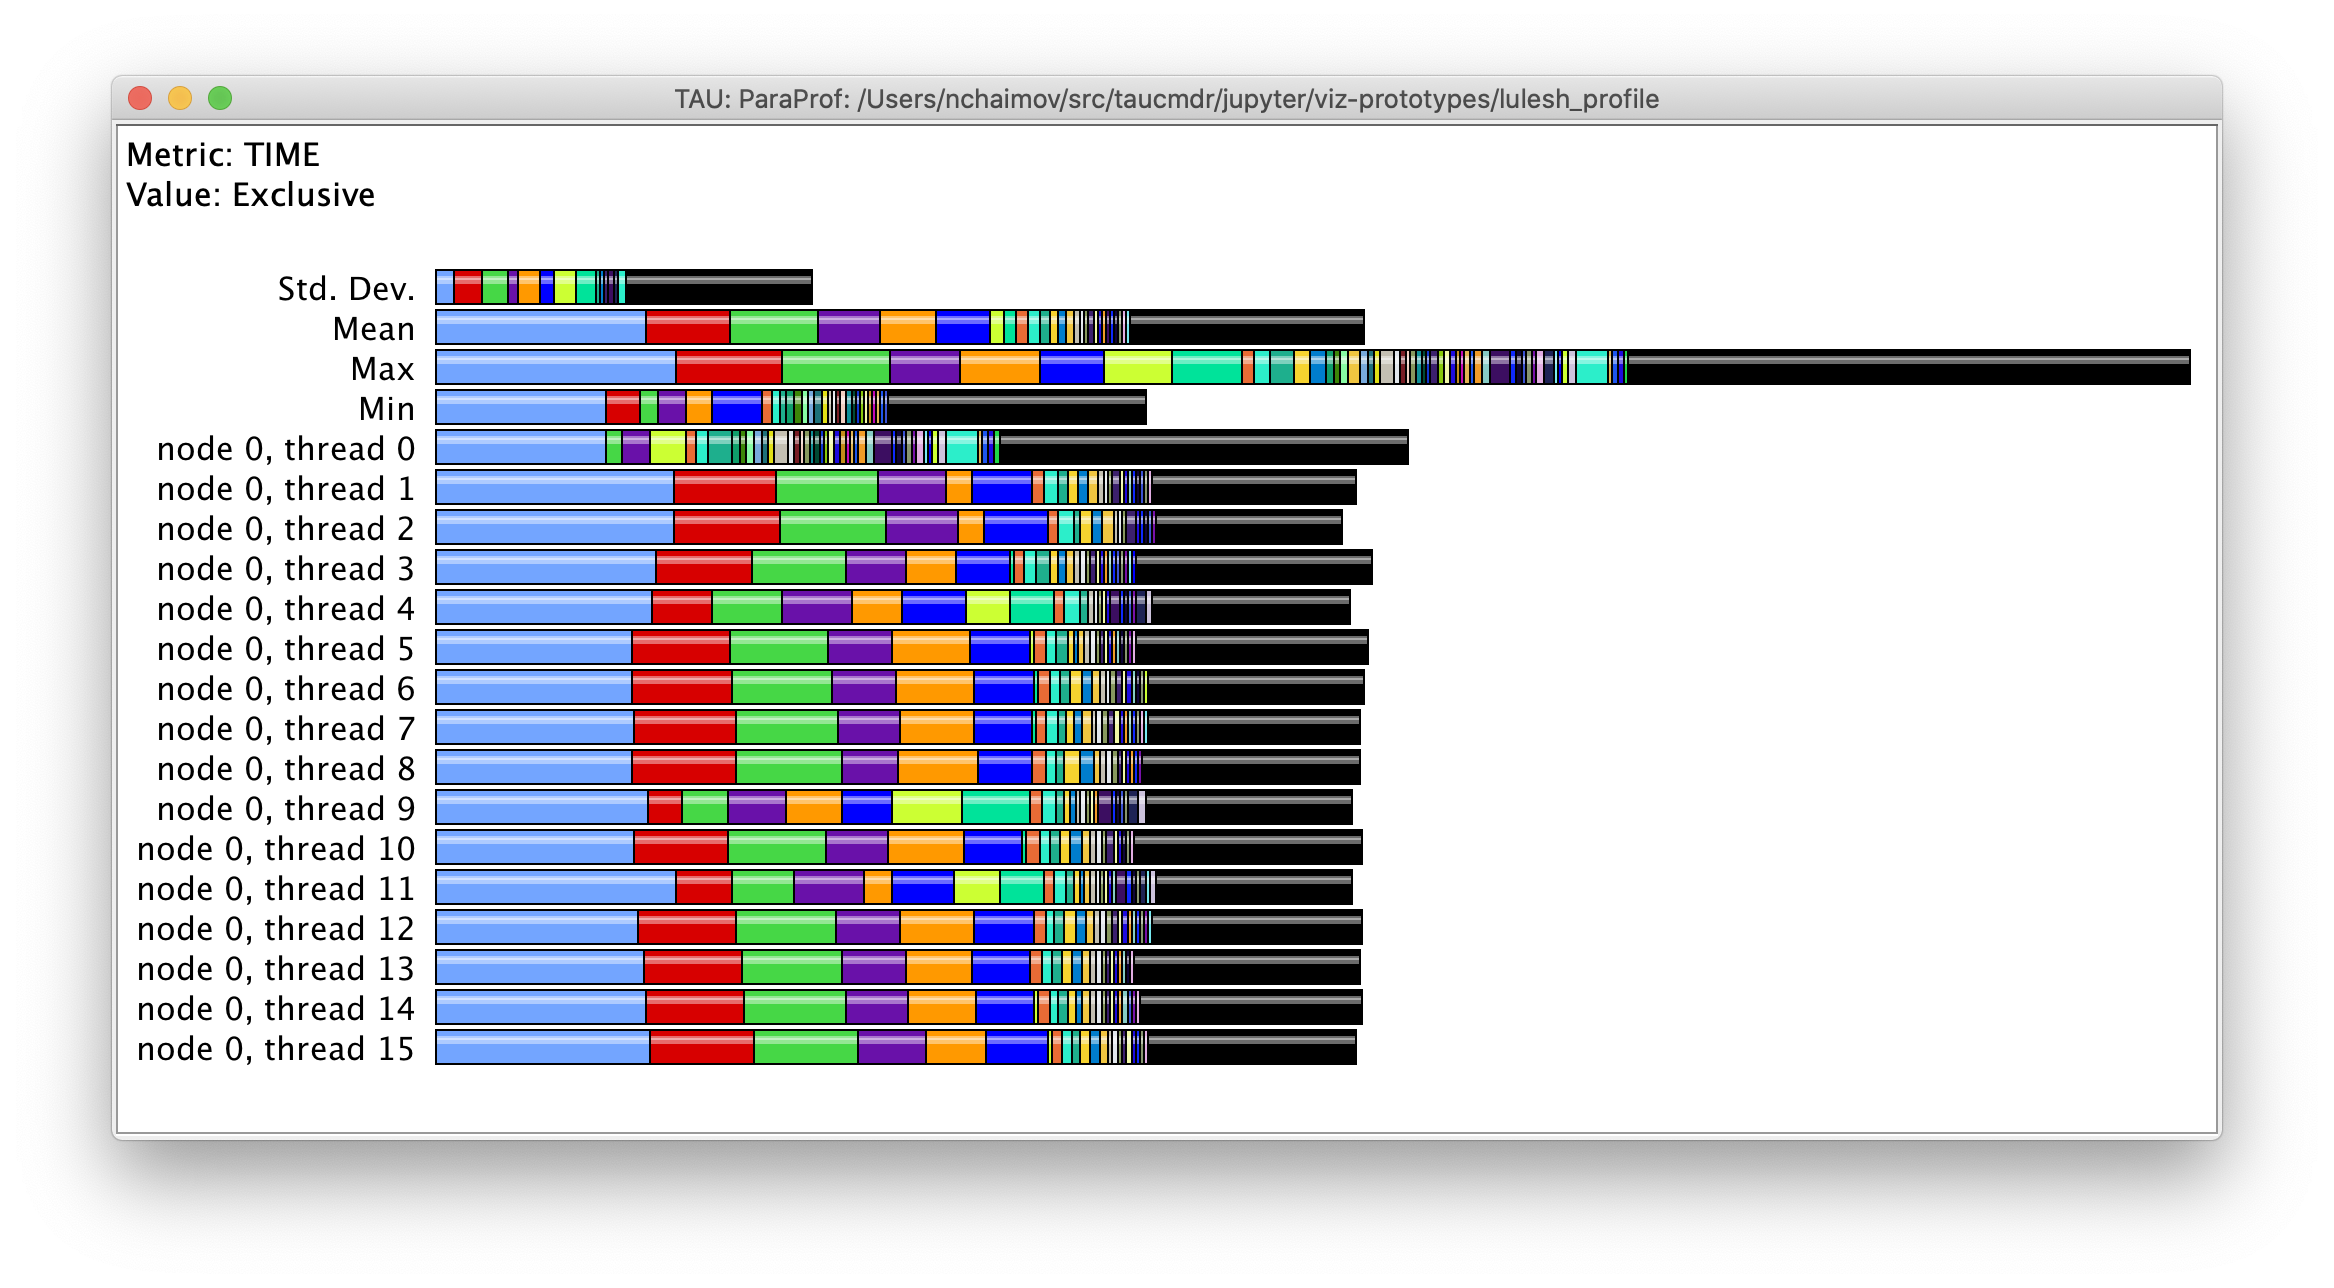 

First, we get a DataFrame containing the Exclusive timing values.

In [12]:
COL_NAME = 'Exclusive'
metric_data = lulesh_data.interval_data()[[COL_NAME]]
metric_data

Exclusive
Node Context Thread Timer                                                        
0    0       0      .TAU application                                       511348
                    OpenMP_Parallel_Region TimeIncrement [{/home/us...       1731
                    OpenMP_Implicit_Task                                   891227
                    OpenMP_Sync_Region_Barrier TimeIncrement [{/hom...       2751
                    OpenMP_Parallel_Region InitStressTermsForElems ...       1055
...                                                                           ...
             11     OpenMP_Implicit_Task                                  1807735
                    OpenMP_Sync_Region_Barrier ApplyMaterialPropert...        946
                    OpenMP_Sync_Region_Barrier EvalEOSForElems(Doma...      31866
                    OpenMP_Sync_Region_Barrier CalcCourantConstrain...       9663
                    OpenMP_Sync_Region_Barrier CalcHydroConstraintF...       9666

[145 rows x 1 columns]

Next, we change the shape of the dataframe to match what Plotly expects. We want the data to be sorted in the order we stacked bars to appear in the plot, and we want there to be some value for every timer on every `(n,c,t)`. 

We start by `unstack`ing the DataFrame, which "pivots" the dataframe, promoting the innermost index to a column. This results in each timer name being a distinct column rather than part of each row. This ensures that there is an entry for every timer on every `(n,c,t)`. Where a timer is missing, it now exists and has the value `NaN`.

We then sort the columns descending by the timer values on (0,0,0). When we construct the plot, this order will be used for every `(n,c,t)`.

Finally, we transpose the DataFrame to restore the timers as rows, and fill in `NaN` values with 0.

In [13]:
sorted_data = metric_data.unstack().sort_values((0, 0, 0), axis=1, ascending=False).transpose().fillna(0)
sorted_data

Node                                                                 0  \
Context                                                              0   
Thread                                                              0    
          Timer                                                          
Exclusive OpenMP_Implicit_Task                                891227.0   
          .TAU application                                    511348.0   
          OpenMP_Parallel_Region CalcPressureForElems [{/...  107560.0   
          OpenMP_Sync_Region_Barrier CalcPressureForElems...   74104.0   
          OpenMP_Sync_Region_Barrier EvalEOSForElems(Doma...   72840.0   
...                                                                ...   
          OpenMP_Sync_Region_Barrier CalcVelocityForNodes...     708.0   
          OpenMP_Sync_Region_Barrier UpdateVolumesForElem...     608.0   
          OpenMP_Sync_Region_Barrier ApplyAccelerationBou...     508.0   
          OpenMP_Sync_Region_Barrier ApplyMaterialPropert...     349.0   
          OpenMP_Thread_Type_ompt_thread_worker                    0.0   

Node                                                                     \
Context                                                                   
Thread                                                               1    
          Timer                                                           
Exclusive OpenMP_Implicit_Task                                1749812.0   
          .TAU application                                        229.0   
          OpenMP_Parallel_Region CalcPressureForElems [{/...        0.0   
          OpenMP_Sync_Region_Barrier CalcPressureForElems...        0.0   
          OpenMP_Sync_Region_Barrier EvalEOSForElems(Doma...    40411.0   
...                                                                 ...   
          OpenMP_Sync_Region_Barrier CalcVelocityForNodes...        0.0   
          OpenMP_Sync_Region_Barrier UpdateVolumesForElem...        0.0   
          OpenMP_Sync_Region_Barrier ApplyAccelerationBou...        0.0   
          OpenMP_Sync_Region_Barrier ApplyMaterialPropert...        0.0   
          OpenMP_Thread_Type_ompt_thread_worker                546772.0   

Node                                                                     \
Context                                                                   
Thread                                                               2    
          Timer                                                           
Exclusive OpenMP_Implicit_Task                                1839828.0   
          .TAU application                                        267.0   
          OpenMP_Parallel_Region CalcPressureForElems [{/...        0.0   
          OpenMP_Sync_Region_Barrier CalcPressureForElems...        0.0   
          OpenMP_Sync_Region_Barrier EvalEOSForElems(Doma...    58598.0   
...                                                                 ...   
          OpenMP_Sync_Region_Barrier CalcVelocityForNodes...        0.0   
          OpenMP_Sync_Region_Barrier UpdateVolumesForElem...        0.0   
          OpenMP_Sync_Region_Barrier ApplyAccelerationBou...        0.0   
          OpenMP_Sync_Region_Barrier ApplyMaterialPropert...        0.0   
          OpenMP_Thread_Type_ompt_thread_worker                430260.0   

Node                                                                     \
Context                                                                   
Thread                                                               3    
          Timer                                                           
Exclusive OpenMP_Implicit_Task                                1809159.0   
          .TAU application                                        338.0   
          OpenMP_Parallel_Region CalcPressureForElems [{/...        0.0   
          OpenMP_Sync_Region_Barrier CalcPressureForElems...        0.0   
          OpenMP_Sync_Region_Barrier 

The profile overview in ParaProf does not include *all* the timers, but only the top N timers instead, with other time being attributed to an "other" timer colored black on the plot.

Thus, next we want to truncate the DataFrame, including only the top N timers. 

(Note that this truncates based on the top N timers on `(0,0,0)` and applies this to all the threads)

This is done by concatenating the dataframe obtained from slicing the dataframe to obtain the first `TOP_N` rows with the dataframe obtained by summing the slice of all the remaining rows; that row is named "Other" 

In [14]:
TOP_N = 10
truncated = pd.concat([sorted_data[:TOP_N], sorted_data[TOP_N:].sum(level=0).rename({COL_NAME: 'Other'})], copy=False)
truncated

Node                                                       0             \
Context                                                    0              
Thread                                                    0          1    
(Exclusive, OpenMP_Implicit_Task)                   891227.0  1749812.0   
(Exclusive, .TAU application)                       511348.0      229.0   
(Exclusive, OpenMP_Parallel_Region CalcPressure...  107560.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier CalcPres...   74104.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier EvalEOSF...   72840.0    40411.0   
(Exclusive, OpenMP_Parallel_Region CalcPressure...   71714.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier CalcPres...   45203.0        0.0   
(Exclusive, OpenMP_Parallel_Region EvalEOSForEl...   36251.0        0.0   
(Exclusive, OpenMP_Parallel_Region CalcEnergyFo...   35976.0        0.0   
(Exclusive, OpenMP_Parallel_Region CalcEnergyFo...   35973.0        0.0   
Other                                               480680.0   574172.0   

Node                                                                      \
Context                                                                    
Thread                                                     2          3    
(Exclusive, OpenMP_Implicit_Task)                   1839828.0  1809159.0   
(Exclusive, .TAU application)                           267.0      338.0   
(Exclusive, OpenMP_Parallel_Region CalcPressure...        0.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier CalcPres...        0.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier EvalEOSF...    58598.0    33841.0   
(Exclusive, OpenMP_Parallel_Region CalcPressure...        0.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier CalcPres...        0.0        0.0   
(Exclusive, OpenMP_Parallel_Region EvalEOSForEl...        0.0        0.0   
(Exclusive, OpenMP_Parallel_Region CalcEnergyFo...        0.0        0.0   
(Exclusive, OpenMP_Parallel_Region CalcEnergyFo...        0.0        0.0   
Other                                                467639.0   524457.0   

Node                                                                      \
Context                                                                    
Thread                                                     4          5    
(Exclusive, OpenMP_Implicit_Task)                   1829328.0  1829775.0   
(Exclusive, .TAU application)                           194.0      146.0   
(Exclusive, OpenMP_Parallel_Region CalcPressure...        0.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier CalcPres...        0.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier EvalEOSF...    36393.0    34454.0   
(Exclusive, OpenMP_Parallel_Region CalcPressure...        0.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier CalcPres...        0.0        0.0   
(Exclusive, OpenMP_Parallel_Region EvalEOSForEl...        0.0        0.0   
(Exclusive, OpenMP_Parallel_Region CalcEnergyFo...        0.0        0.0   
(Exclusive, OpenMP_Parallel_Region CalcEnergyFo...        0.0        0.0   
Other                                                503575.0   506943.0   

Node                                                                      \
Context                                                                    
Thread                                                     6          7    
(Exclusive, OpenMP_Implicit_Task)                   1792788.0  1823065.0   
(Exclusive, .TAU application)                            12.0        7.0   
(Exclusive, OpenMP_Parallel_Region CalcPressure...        0.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier CalcPres...        0.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier EvalEOSF...    31202.0    55905.0   
(Exclusive, OpenMP_Parallel_Region CalcPressure...        0.0        0.0   
(Exclusive, OpenMP_Sync_Region_Barrier CalcPres...        0.0        0.0   
(Exclusive, OpenMP_Parallel_Region EvalEOSForEl...        0

As our final preparation before generating the plot, we get the `(n,c,t)` indices to use as labels in the plot.

In [15]:
indices = ["node {}, thread {}".format(n, t) for (n,c,t) in truncated.columns.values]
num_indices = len(indices)

The GraphObject interface to Plotly takes lists of graph objects that are to be plotted. Here, we generate a Plotly Bar object for each row in the final version of the DataFrame (so, one Bar object for each Timer).

An example of creating a stacked horizontal bar chart is available in the Plotly documentation at https://plotly.com/python/horizontal-bar-charts/#colored-horizontal-bar-chart

In the list of Bar objects, each entry represents all the timer values for a specific timer on all `(n,c,t)` combinations.

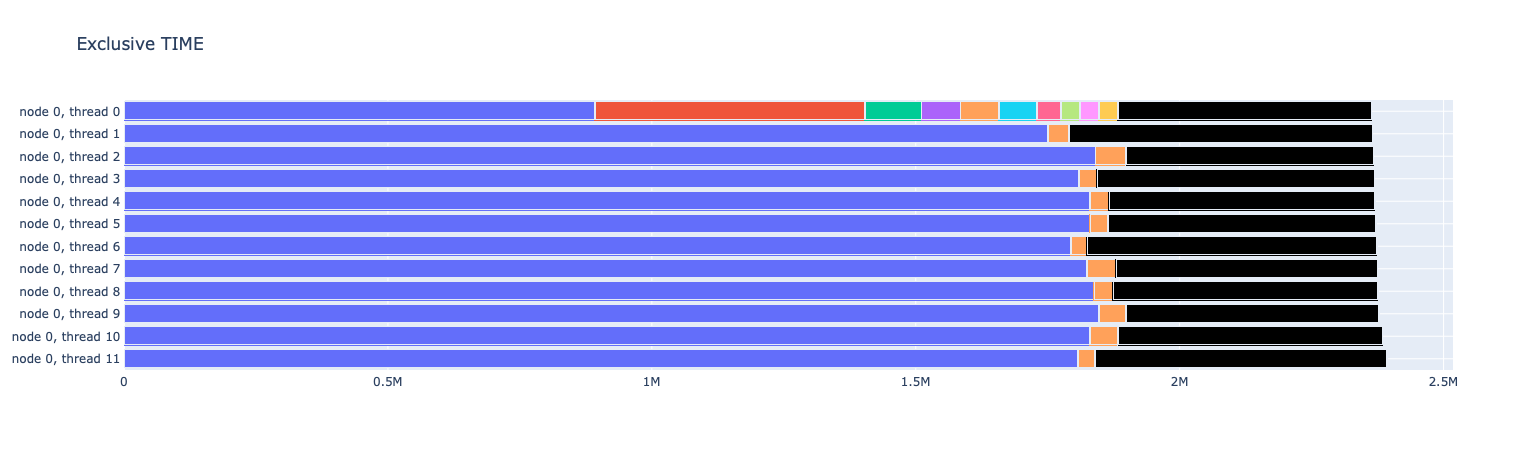

In [16]:
data = [go.Bar(
    y=indices[::-1],      # These are the labels on the Y axis. These are reversed so that (0,0,0) ends up on the top
    x=row.values[::-1],   # The timer values also have to be reversed so that they appear with the correct index
    orientation='h',      # Make this a horizontal bar plot (default is vertical)
    hoverinfo='text',     # When hovering over a region, show custom text. 
    # The custom text is the first 75 characters of the timer name.
    text=["<br>".join([index[1][i:i + 75] for i in range(0, len(index[1]), 75)])] * num_indices
) for index, row in truncated.iterrows()]

data[-1]['marker'] = {'color': '#000000'} # Make the last entry (the "Other" entry) have a black color
data[-1]['text'] = 'Other'                # Name the last entry "Other"

layout = go.Layout(
    barmode='stack',     # Specify a stacked bar plot
    showlegend=False,    # Hide the legend
    hovermode='closest', # Only show the pop-up label for the region that the mouse cursor is currently over
    title='{} {}'.format(COL_NAME, lulesh_data.metric.decode()) # A title for the graph
)

fig = go.Figure(data=data, layout=layout)
fig

This can be encapsulated into a function to produce such charts:

In [17]:
def profile_overview_plot(trial_data, col_name, top_n):
    metric_data = trial_data.interval_data()[[COL_NAME]]
    sorted_data = metric_data.unstack().sort_values((0, 0, 0), axis=1, ascending=False).transpose().fillna(0)
    truncated = pd.concat([sorted_data[:top_n], sorted_data[top_n:].sum(level=0).rename({col_name: 'Other'})], copy=False)
    indices = [str(i) for i in truncated.columns.values]
    num_indices = len(indices)
    data = [go.Bar(
        y=indices[::-1],      # These are the labels on the Y axis. These are reversed so that (0,0,0) ends up on the top
        x=row.values[::-1],   # The timer values also have to be reversed so that they appear with the correct index
        orientation='h',      # Make this a horizontal bar plot (default is vertical)
        hoverinfo='text',     # When hovering over a region, show custom text. 
        # The custom text is the first 75 characters of the timer name.
        text=["<br>".join([index[1][i:i + 75] for i in range(0, len(index[1]), 75)])] * num_indices
    ) for index, row in truncated.iterrows()]

    data[-1]['marker'] = {'color': '#000000'} # Make the last entry (the "Other" entry) have a black color
    data[-1]['text'] = 'Other'                # Name the last entry "Other"

    layout = go.Layout(
        barmode='stack',     # Specify a stacked bar plot
        showlegend=False,    # Hide the legend
        hovermode='closest', # Only show the pop-up label for the region that the mouse cursor is currently over
        title='{} {}'.format(col_name, trial_data.metric.decode()) # A title for the graph
    )
    
    fig = go.Figure(data=data, layout=layout)
    return fig

Here is the plot of the top 30 timers:

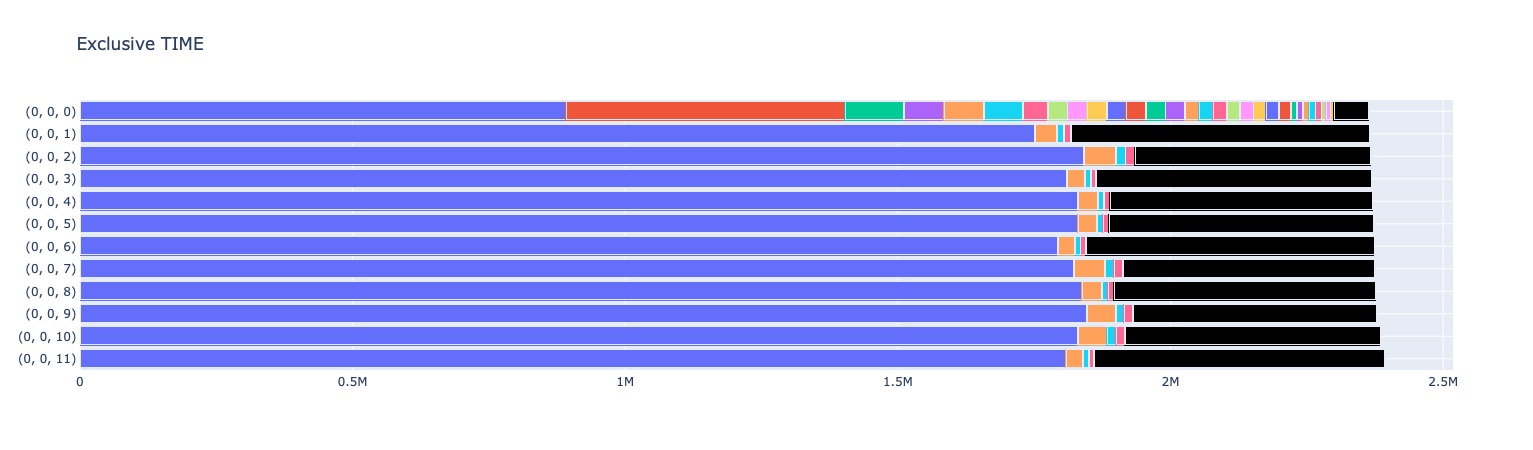

In [18]:
profile_overview_plot(lulesh_data, col_name='Exclusive', top_n=30)

This is similar to the Overall Profile view in ParaProf. It lacks the Std. Dev., Mean, Max, and Min rows, but adding them should not be particularly difficult -- those would simply need to be added as columns to the DataFrame used to generate the plot.

Individual Profile Plot
-----------------------

Another view in ParaProf is the view for an individual profile; for example, this view which shows all the timers from `(0,0,0)` from `lulesh_data`.

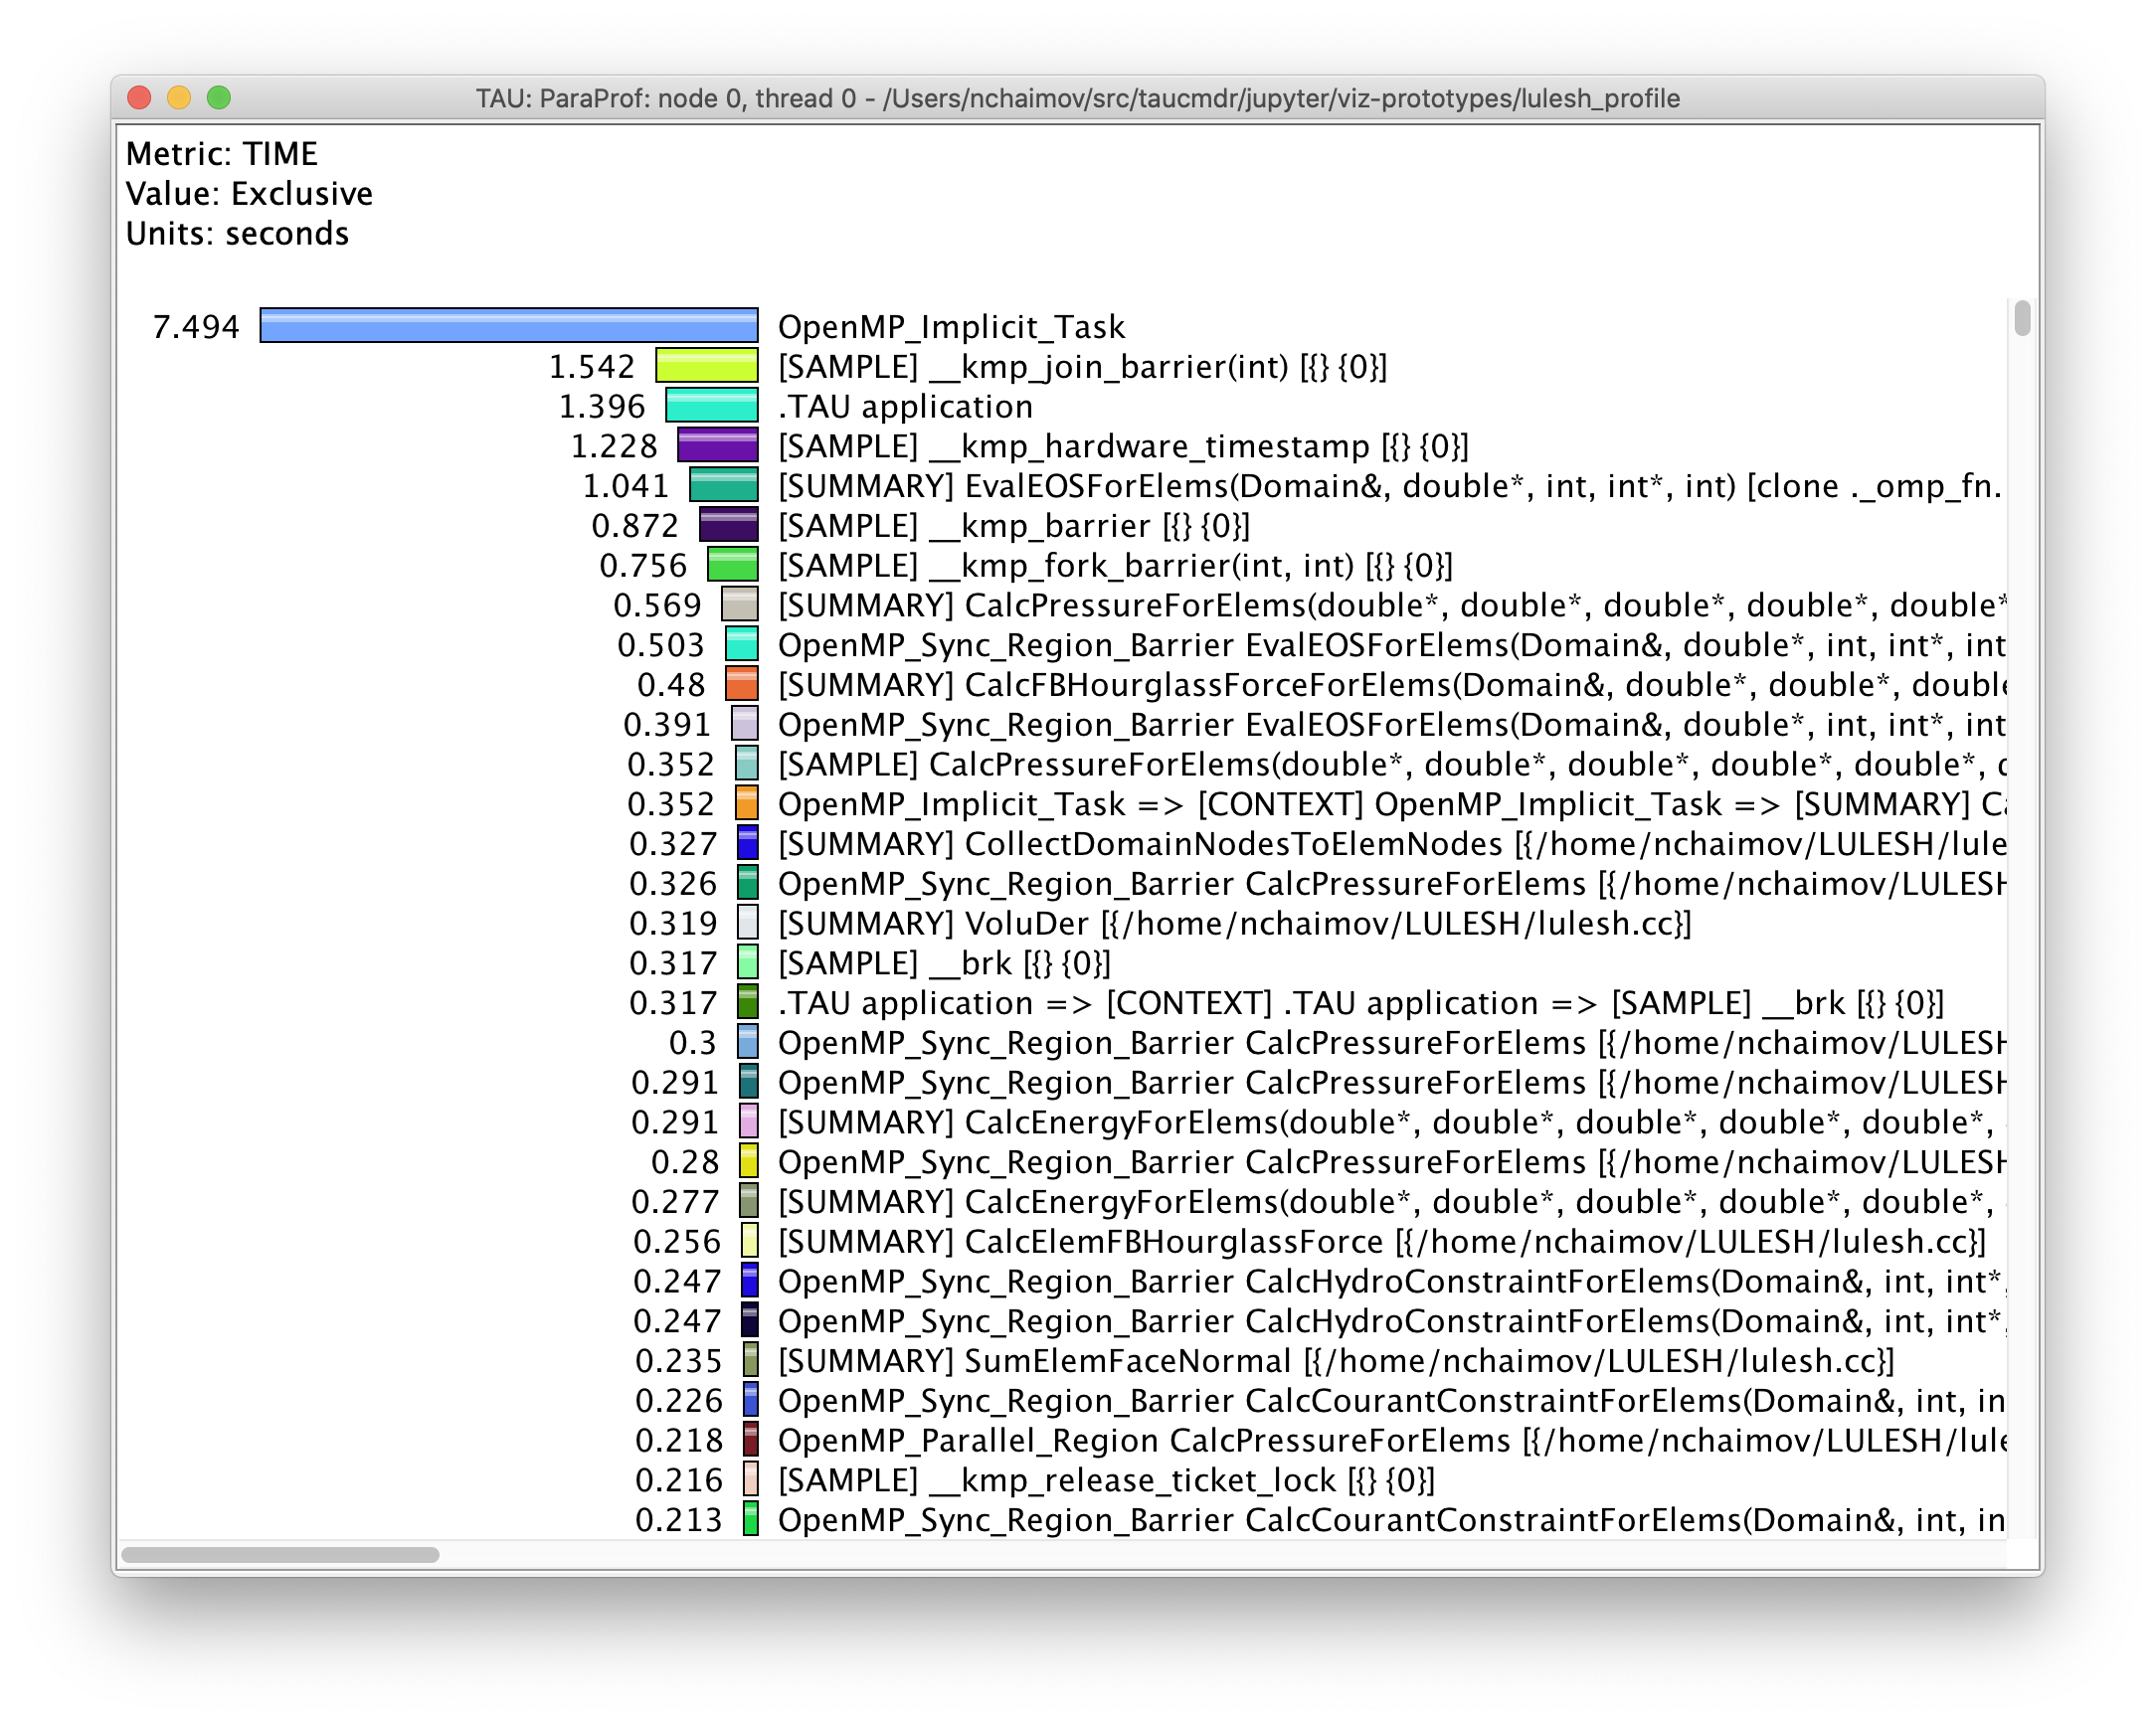 

A complication is that Plotly will give all the plots the same color by default, since they come from the same series. As such, we have to provide colors. In the prototype integrated into TAU Commander, I used a third party library to generate a palette of colors to select from. To avoid having a dependency on Bokeh in this notebook, the colors are simply directly included in the cell below, but see also https://github.com/ParaToolsInc/taucmdr/blob/enterprise/packages/taucmdr/gui/color.py for the version that uses palettes from the Bokeh library.

In [19]:
colors_str = "#1f77b4,#aec7e8,#ff7f0e,#ffbb78,#2ca02c,#98df8a,#d62728,#ff9896,#9467bd,#c5b0d5,#8c564b,#c49c94,#e377c2,#f7b6d2,#7f7f7f,#c7c7c7,#bcbd22,#dbdb8d,#17becf,#9edae5,#7fc97f,#beaed4,#fdc086,#ffff99,#386cb0,#f0027f,#bf5b17,#666666,#1b9e77,#d95f02,#7570b3,#e7298a,#66a61e,#e6ab02,#a6761d,#666666,#fbb4ae,#b3cde3,#ccebc5,#decbe4,#fed9a6,#ffffcc,#e5d8bd,#fddaec,#f2f2f2,#393b79,#5254a3,#6b6ecf,#9c9ede,#637939,#8ca252,#b5cf6b,#cedb9c,#8c6d31,#bd9e39,#e7ba52,#e7cb94,#843c39,#ad494a,#d6616b,#e7969c,#7b4173,#a55194,#ce6dbd,#de9ed6,#8dd3c7,#ffffb3,#bebada,#fb8072,#80b1d3,#fdb462,#b3de69,#fccde5,#d9d9d9,#bc80bd,#ccebc5,#ffed6f,#3182bd,#6baed6,#9ecae1,#c6dbef,#e6550d,#fd8d3c,#fdae6b,#fdd0a2,#31a354,#74c476,#a1d99b,#c7e9c0,#756bb1,#9e9ac8,#bcbddc,#dadaeb,#636363,#969696,#bdbdbd,#d9d9d9"
colors = colors_str.split(',')

First, we get the interval data and sort it. For this example, we'll use the data from `(0,0,0)`:

In [20]:
INDEX = (0,0,0)
COL_NAME = 'Exclusive'

sorted_frame = lulesh_data.interval_data().loc[INDEX][[COL_NAME]].sort_values(COL_NAME)
sorted_frame

Exclusive
Timer                                                        
OpenMP_Sync_Region_Barrier ApplyMaterialPropert...        349
OpenMP_Sync_Region_Barrier ApplyAccelerationBou...        508
OpenMP_Sync_Region_Barrier UpdateVolumesForElem...        608
OpenMP_Sync_Region_Barrier CalcVelocityForNodes...        708
OpenMP_Sync_Region_Barrier InitStressTermsForEl...        721
...                                                       ...
OpenMP_Sync_Region_Barrier EvalEOSForElems(Doma...      72840
OpenMP_Sync_Region_Barrier CalcPressureForElems...      74104
OpenMP_Parallel_Region CalcPressureForElems [{/...     107560
.TAU application                                       511348
OpenMP_Implicit_Task                                   891227

[68 rows x 1 columns]

Next, we get the maximum value, which we will use to set the scale for the axes.

In [21]:
smax = sorted_frame[COL_NAME].max()
smax

891227

We then plot using Plotly.

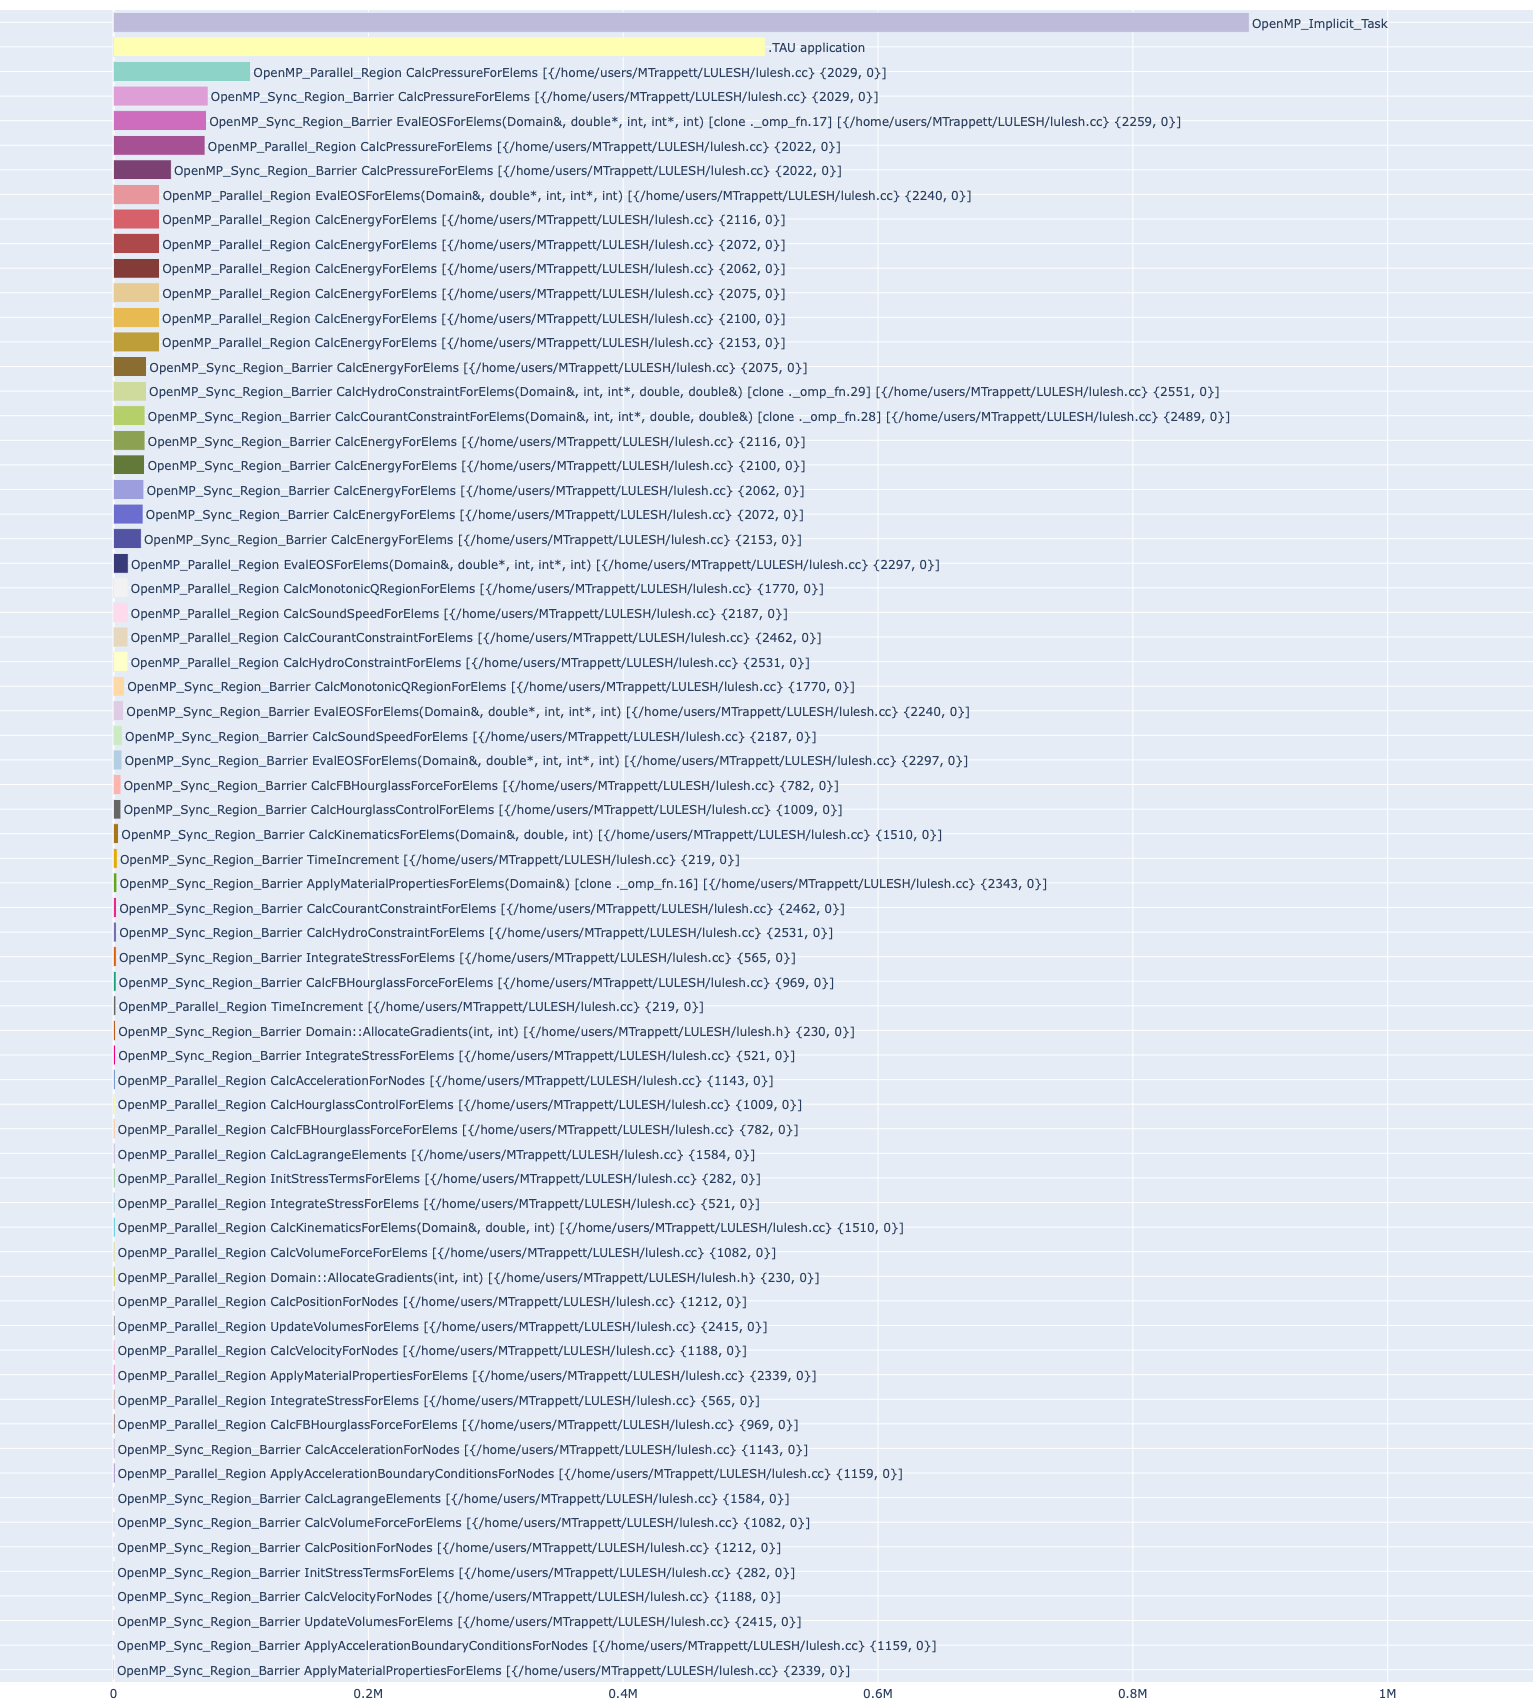

In [22]:
data = [
    go.Bar(
        x=sorted_frame[COL_NAME],     # Timer Values
        y=sorted_frame.index.values,  # Timer Names
        orientation='h',              # Horizontal
        marker=dict(
            # Pick the next color from the list. If we run out of colors, start over.
            color=list(islice(cycle(colors), sorted_frame.shape[0])),    
        ),
        text=sorted_frame.index.values, # Label the entries with the timer time
        textposition='outside',         # and put those labels on the outside of the bar
    )
]

layout = go.Layout(
    autosize=True,
    height=25 * sorted_frame.shape[0],
    margin=go.layout.Margin(
        l=0,
        r=0,
        b=0,
        t=10,
    ),
    xaxis=dict(
        # Expand the X axis range a bit so that the bars don't appear right at the edge, and to leave space for the labels
        range=[-0.1 * smax, smax * 1.25]
    ),
)

fig = go.Figure(data=data, layout=layout)
fig

To match ParaProf, this needs to have the bars grow in the other direction (left-to-right) and display the timer values directly on the plot.

I haven't figured out how to get Plotly to do those things yet.